In [1]:
ss1 = 'Apple and Banana Republic are american brands.'
ss2 = 'Apple and banana are my favorite fruits.'

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
def cosine_distance_countvectorizer_method(s1, s2):
    
    # sentences to list
    allsentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return cosine

In [4]:
cosine_distance_countvectorizer_method(ss1 , ss2)

Similarity of two sentences are equal to  57.14 %


0.4285714285714285

In [5]:
gloveFile = "glove.6B.300d.txt"
import numpy as np
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

import re
from nltk.corpus import stopwords
import pandas as pd

def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([model[word] for word in preprocess(s1)],axis=0)
    vector_2 = np.mean([model[word] for word in preprocess(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
#     print(round((1-cosine)*100,2))
    return round((1-cosine)*100, 2)

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    # ax_red = sns.heatmap(df)
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue

In [6]:
ss1 = 'Apple and banana are my favorite fruits.'
ss2 = 'Apple and Banana Republic are american brands.'

model = loadGloveModel(gloveFile)
print(cosine_distance_wordembedding_method(ss1, ss2))

Loading Glove Model


FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.300d.txt'

29.58


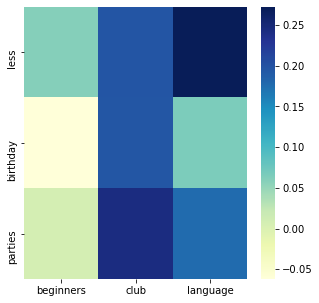

In [204]:
ss1 = 'No more (or less) birthday parties'
ss2 = 'Language club for beginners'

#model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences(ss1,ss2)

In [61]:
# TEST EFFICIENCY

In [197]:
import pandas as pd
data_frame = pd.read_csv("headlines.test.tsv", sep="\t")

# print(data_frame)
# print(data_frame[['Similarity', 'Sentence 1', 'Sentence 2']]) 
data_frame

,Similarity,Sentence 1,Sentence 2
0,4.20,"In Nigeria, Chevron has been accused by the Al...","In Nigeria, the whole ijaw indigenous showed C..."
1,4.25,I know that in France they have had whole herd...,"I know that in France, the principle of slaugh..."
2,4.80,"Unfortunately, the ultimate objective of a Eur...",Unfortunately the final objective of a Europea...
3,4.80,The right of a government arbitrarily to set a...,The right for a government to draw aside its c...
4,4.80,The right of a government arbitrarily to set a...,The right for a government to dismiss arbitrar...
...,...,...,...
61,2.75,Mr Morse is charged with assault and Mr Darvis...,His partner Bijan Darvish is charged with fili...
62,3.25,"The mock explosion, the first event in the dri...","The mock explosion of a radioactive ""dirty bom..."
63,3.25,"The third appointment was to a new job, execut...","Bruce N. Hawthorne, 53, was named executive vi..."
64,2.50,The commission dropped charges that Patton imp...,Patton also appointed Conner to the Kentucky L...


In [198]:
np_similarity_array1 = []
np_similarity_array2 = []

for index, row in data_frame.iterrows():
    cosine_similarity = cosine_distance_wordembedding_method(row['Sentence 1'], row['Sentence 2'])
    np_similarity_array1.append(row['Similarity'] * 20)
    np_similarity_array2.append(cosine_similarity)
    print('SIMILARITIES: T-', row['Similarity'] * 20, ' C-', cosine_similarity)
    print(row['Sentence 1'], row['Sentence 2'])

SIMILARITIES: T- 84.0  C- 95.88
In Nigeria, Chevron has been accused by the All-Ijaw indigenous people of instigating violence against them and actually paying Nigerian soldiers to shoot protesters at the Warri naval base. In Nigeria, the whole ijaw indigenous showed Chevron to encourage the violence against them and of up to pay Nigerian soldiers to shoot the demonstrators at the naval base from Warri.
SIMILARITIES: T- 85.0  C- 90.51
I know that in France they have had whole herd slaughter and this does not seem to be the best way forward. I know that in France, the principle of slaughter of whole herd has been implemented and that this is not the best way to combat this phenomenon.
SIMILARITIES: T- 96.0  C- 95.99
Unfortunately, the ultimate objective of a European Constitution would be precisely the opposite, and so, of course, we cannot vote for it. Unfortunately the final objective of a European Constitution would be exactly the opposite and obviously we cannot approve it.
SIMILARI

In [207]:
from sklearn.metrics import mean_squared_error

mean_squared_error(np_similarity_array1, np_similarity_array2)

555.1939954545455

In [208]:
from sklearn.metrics import max_error
max_error(np_similarity_array1, np_similarity_array2)

60.87

In [209]:
from sklearn.metrics import r2_score

r2_score(np_similarity_array1, np_similarity_array2)

-0.7387558583174971